In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# create a set of random latitudes and longitudes
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [4]:
# add the lats and longs to a list
coordinates = list(lat_lngs)

In [5]:
import requests
from config import weather_api_key

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [6]:
# use citipy module to locate city based on lat and long
from citipy import citipy

In [7]:
# use tuple to display coordinates
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

saint-pierre pm
alencon fr
busselton au
kapaa us
castro cl
vaini to
pangnirtung ca
rimbey ca
cape town za
la ronge ca
bluff nz
lebu cl
kapaa us
albany au
dalian cn
butaritari ki
punta arenas cl
east london za
cape town za
corinto ni
klaksvik fo
ushuaia ar
albany au
san patricio mx
rikitea pf
atuona pf
ushuaia ar
sept-iles ca
dolinsk ru
ust-kamchatsk ru
jiroft ir
atuona pf
mataura pf
punta arenas cl
taolanaro mg
waitati nz
hobart au
busselton au
tasiilaq gl
tura ru
mataura pf
rikitea pf
kapaa us
ushuaia ar
cape town za
farafangana mg
butaritari ki
hasaki jp
hermanus za
sao jose da coroa grande br
hobart au
jacareacanga br
bambous virieux mu
lazaro cardenas mx
chokurdakh ru
busselton au
victoria sc
hermanus za
jamestown sh
butaritari ki
mataura pf
nizhneyansk ru
pevek ru
hermanus za
yarmouth ca
port elizabeth za
camacha pt
hermanus za
kinna se
ormara pk
ushuaia ar
esperance au
saint george bm
barabinsk ru
severo-kurilsk ru
albany au
atuona pf
sentyabrskiy ru
ponta do sol cv
maragogi br
p

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [9]:
import time
from datetime import datetime

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 6 | saint-pierre
Processing Record 2 of Set 6 | alencon
Processing Record 3 of Set 6 | busselton
Processing Record 4 of Set 6 | kapaa
Processing Record 5 of Set 6 | castro
Processing Record 6 of Set 6 | vaini
Processing Record 7 of Set 6 | pangnirtung
Processing Record 8 of Set 6 | rimbey
Processing Record 9 of Set 6 | cape town
Processing Record 10 of Set 6 | la ronge
Processing Record 11 of Set 6 | bluff
Processing Record 12 of Set 6 | lebu
Processing Record 13 of Set 6 | albany
Processing Record 14 of Set 6 | dalian
Processing Record 15 of Set 6 | butaritari
Processing Record 16 of Set 6 | punta arenas
Processing Record 17 of Set 6 | east london
Processing Record 18 of Set 6 | corinto
Processing Record 19 of Set 6 | klaksvik
Processing Record 20 of Set 6 | ushuaia
Processing Record 21 of Set 6 | san patricio
Processing Record 22 of Set 6 | rikitea
Processing Record 23 of Set 6 | atuona
Processing Record 24 of Set 6 | sept-iles
Processing Record 25 of Set 6

In [12]:
# convert the array into a DF
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Pierre,-21.3393,55.4781,73.08,73,75,5.75,RE,2022-01-28 00:24:09
1,Alencon,48.4333,0.0833,39.99,99,100,3.24,FR,2022-01-28 00:24:10
2,Busselton,-33.6500,115.3333,67.05,60,0,12.35,AU,2022-01-28 00:24:10
3,Kapaa,22.0752,-159.3190,81.12,69,0,1.99,US,2022-01-28 00:24:11
4,Castro,-24.7911,-50.0119,65.64,93,100,0.98,BR,2022-01-28 00:22:15
5,Vaini,-21.2000,-175.2000,82.80,77,73,15.52,TO,2022-01-28 00:24:11
6,Pangnirtung,66.1451,-65.7125,-14.04,89,100,6.42,CA,2022-01-28 00:22:34
7,Rimbey,52.6334,-114.2353,32.92,80,57,5.44,CA,2022-01-28 00:24:12
8,Cape Town,-33.9258,18.4232,65.26,72,20,10.36,ZA,2022-01-28 00:23:17
9,La Ronge,55.1001,-105.2842,8.85,78,100,2.30,CA,2022-01-28 00:24:12


In [13]:
# delete this cell after confirming the length is correct!
len(city_data)

801

In [14]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Pierre,RE,2022-01-28 00:24:09,-21.3393,55.4781,73.08,73,75,5.75
1,Alencon,FR,2022-01-28 00:24:10,48.4333,0.0833,39.99,99,100,3.24
2,Busselton,AU,2022-01-28 00:24:10,-33.6500,115.3333,67.05,60,0,12.35
3,Kapaa,US,2022-01-28 00:24:11,22.0752,-159.3190,81.12,69,0,1.99
4,Castro,BR,2022-01-28 00:22:15,-24.7911,-50.0119,65.64,93,100,0.98
...,...,...,...,...,...,...,...,...,...
796,Havoysund,NO,2022-01-28 00:45:41,70.9963,24.6622,23.88,74,100,15.32
797,Futog,RS,2022-01-28 00:45:41,45.2419,19.7070,30.25,85,89,1.36
798,Orativ,UA,2022-01-28 00:45:41,49.1889,29.5270,29.89,87,100,12.84
799,Cabedelo,BR,2022-01-28 00:44:32,-6.9811,-34.8339,77.67,80,56,8.05


In [17]:
# create the output file (csv)
output_data_file = "weather_data/cities.csv"

#export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
# Import the time module --cut this cell!
import time
# Get today's date in seconds.
today = time.time()
today

1643331077.593842

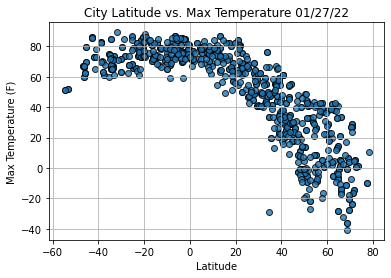

In [21]:
# import the time module
import time

plt.scatter(lats, 
           max_temps,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

#formatting
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save fig
plt.savefig("weather_data/Fig1.png")

plt.show()

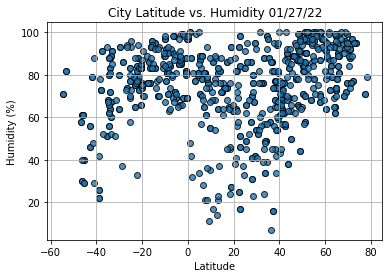

In [22]:
#humidity graph

plt.scatter(lats, 
           humidity,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

#formatting
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save fig
plt.savefig("weather_data/Fig2.png")

plt.show()

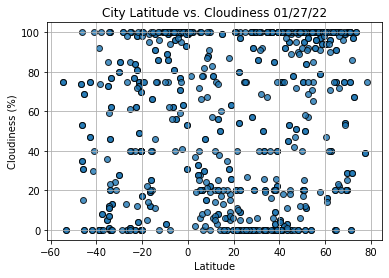

In [24]:
# cloudiness graph

plt.scatter(lats, 
           cloudiness,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

#formatting
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save fig
plt.savefig("weather_data/Fig3.png")

plt.show()

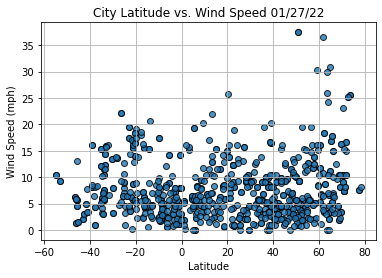

In [25]:
# wind speed graph

plt.scatter(lats, 
           wind_speed,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

#formatting
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#save fig
plt.savefig("weather_data/Fig4.png")

plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
index13 = city_data_df.loc[13]
index13

City                       Dalian
Country                        CN
Date          2022-01-28 00:24:13
Lat                       38.9122
Lng                      121.6022
Max Temp                    22.93
Humidity                       54
Cloudiness                      0
Wind Speed                   4.47
Name: 13, dtype: object

In [30]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4      False
       ...  
796     True
797     True
798     True
799    False
800     True
Name: Lat, Length: 801, dtype: bool

In [34]:
# create N Hem and S Hem DFs
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

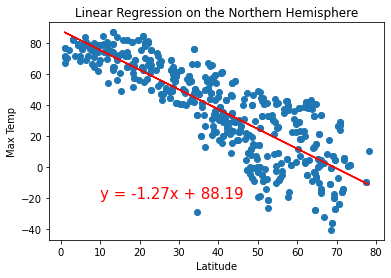

In [36]:
# linear regression on N Hem for temps
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere', 
                       'Max Temp', (10,-20))

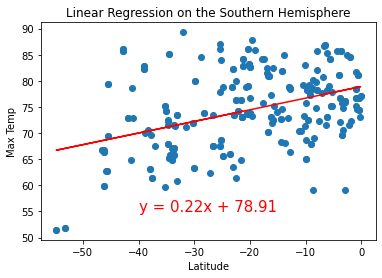

In [38]:
# linear regression on S Hem for temps
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere', 
                       'Max Temp', (-40,55))

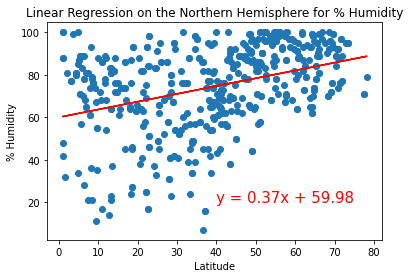

In [41]:
# linear regression on N Hem for humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for % Humidity', 
                       '% Humidity', (40,20))

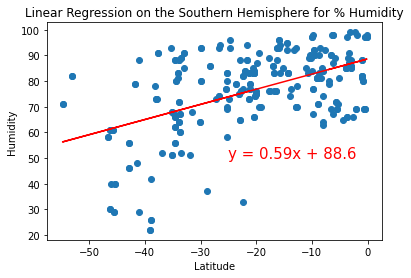

In [45]:
# linear regression on S Hem for humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for % Humidity', 
                       'Humidity', (-25,50))

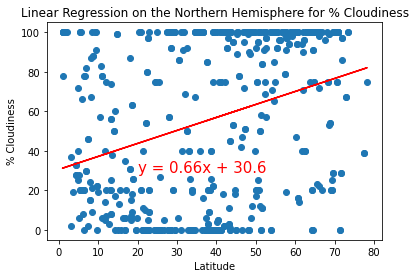

In [49]:
# linear regression on N Hem for cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for % Cloudiness', 
                       '% Cloudiness', (20,29))

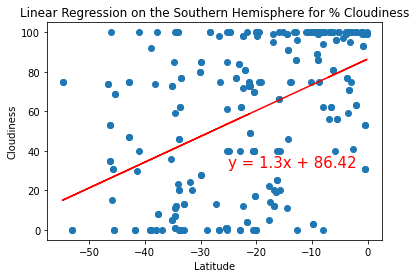

In [53]:
# linear regression on S Hem for cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for % Cloudiness', 
                       'Cloudiness', (-25,32))

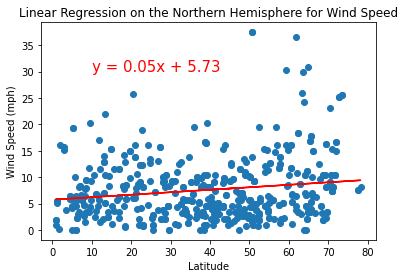

In [55]:
# linear regression on N Hem for wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Wind Speed', 
                       'Wind Speed (mph)', (10,30))

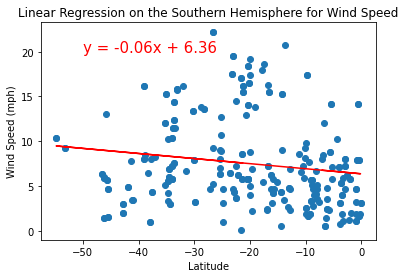

In [58]:
# linear regression on S Hem for wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Wind Speed', 
                       'Wind Speed (mph)', (-50,20))